# Credit Score Prediction Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PowerTransformer,StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,f1_score,log_loss
from imblearn.over_sampling import SMOTE

In [3]:
import credit_func

url = "credit-score.csv"
credit_data = pd.read_csv(url)
credit_func.create_dataFrame(credit_data, csv=True)

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Interest_Rate,Outstanding_Debt,Num_of_Loan,Total_Payment_to_Credit_Limit_Ratio,Debt_per_Credit_Card,Credit_Card_Utilization_Density,Daily_Payment_Delay,High_Credit_Use,Credit_Score
0,3392,19114.12,1824.843333,21.465380,3.0,809.98,4.0,4.398842,202.495,6.705655,0.100000,1,0
1,3392,19114.12,1824.843333,21.465380,3.0,809.98,4.0,4.398842,202.495,7.986240,0.100000,1,0
2,3392,19114.12,1824.843333,21.465380,3.0,809.98,4.0,4.398842,202.495,7.152338,0.100000,1,0
3,3392,19114.12,1824.843333,21.465380,3.0,809.98,4.0,7.906690,202.495,7.844465,0.166667,1,0
4,3392,19114.12,1824.843333,21.465380,3.0,809.98,4.0,4.398842,202.495,6.199337,0.200000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,39628.99,3359.415833,24.028477,7.0,502.38,2.0,3.052524,83.730,5.777262,0.766667,1,1
99996,37932,39628.99,3359.415833,24.028477,7.0,502.38,2.0,3.052524,83.730,6.760938,0.600000,1,1
99997,37932,39628.99,3359.415833,24.028477,7.0,502.38,2.0,3.052524,83.730,6.875920,0.900000,1,1
99998,37932,39628.99,3359.415833,24.028477,7.0,502.38,2.0,3.052524,83.730,5.606368,0.666667,1,2


In [12]:
url = "new_cs.csv"
credit_data = pd.read_csv(url)
pd.set_option('display.max_columns', None)
credit_data.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
# Özellik isimleri ve hedef değişken
feature_names = ['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Amount_invested_monthly', 'Interest_Rate', 'Outstanding_Debt',
       'Num_of_Loan', 'Total_Payment_to_Credit_Limit_Ratio',
       'Debt_per_Credit_Card', 'Credit_Card_Utilization_Density',
       'Daily_Payment_Delay', 'High_Credit_Use']
target = "Credit_Score"

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = credit_data[feature_names]
y = credit_data[target]

# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X)

# SMOTE uygula
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeniden örneklenmiş veriyi kontrol et
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=feature_names), pd.Series(y_resampled, name=target)], axis=1)

### Train - Test Splitting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced')
rf_model.fit(X_train, y_train)


In [27]:
y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.7646


### KNN Model

In [18]:
# KNN modelini oluştur ve eğit
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = knn_model.predict(X_test)

# Doğruluk (accuracy) hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")
#0.77615 k=3 ile

KNN Accuracy: 0.86732487070992


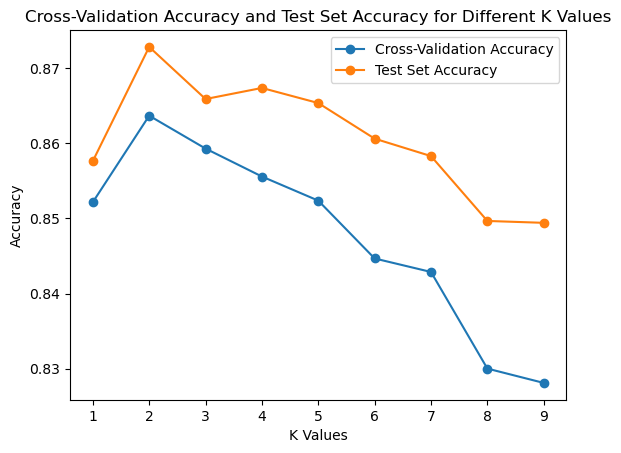

Best K Value: 2


In [16]:
from sklearn.model_selection import cross_val_score
# Kullanılacak K değerleri
k_values = list(range(1, 10))

# Çapraz doğrulama doğruluk değerlerini ve gerçek test seti performansını saklamak için listeler
cv_accuracy_scores = []
test_set_accuracies = []

for k in k_values:
    # KNN modelini oluştur
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Çapraz doğrulama doğruluk değerlerini hesapla
    cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracy_scores.append(np.mean(cv_scores))
    
    # Modeli eğit
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    # Test seti üzerinde doğruluk değerini hesapla
    test_accuracy = accuracy_score(y_test, y_pred)
    test_set_accuracies.append(test_accuracy)

# En iyi K değerini bul
best_k = k_values[np.argmax(cv_accuracy_scores)]

plt.plot(k_values, cv_accuracy_scores, marker='o', label='Cross-Validation Accuracy')
plt.plot(k_values, test_set_accuracies, marker='o', label='Test Set Accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy and Test Set Accuracy for Different K Values')
plt.legend()
plt.show()

print(f"Best K Value: {best_k}")

### Logistic Regression

In [19]:
LR = LogisticRegression(C=0.01, solver="newton-cg",multi_class='multinomial').fit(X_train, y_train)

In [84]:
log_y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)

In [85]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred, average="weighted")

0.5922822246024634

#### Best solver finding

In [20]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Her bir çözücü için çapraz doğrulama ile doğruluk skorunu hesapla
for solver in solvers:
    model = LogisticRegression(solver=solver)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Solver: {solver}, Mean Accuracy: {scores.mean():.3f}")

Solver: newton-cg, Mean Accuracy: 0.653
Solver: lbfgs, Mean Accuracy: 0.653
Solver: liblinear, Mean Accuracy: 0.647
Solver: sag, Mean Accuracy: 0.653
Solver: saga, Mean Accuracy: 0.653


### Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(random_state=42)

# Modeli eğitelim
dt_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = dt_model.predict(X_test)

### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [23]:
y_pred_nb = nb_model.predict(X_test)

In [24]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)

In [25]:
print(f"Accuracy: {accuracy_nb}")

Accuracy: 0.6282400877605391


### Gradient Boosting Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [27]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
y_pred = gb_model.predict(X_test)

# Modelin performansını değerlendir
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sonuçları ekrana yazdır
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6977276288982918
Confusion Matrix:
[[8892  262 1556]
 [1324 7930 1324]
 [2841 2337 5439]]


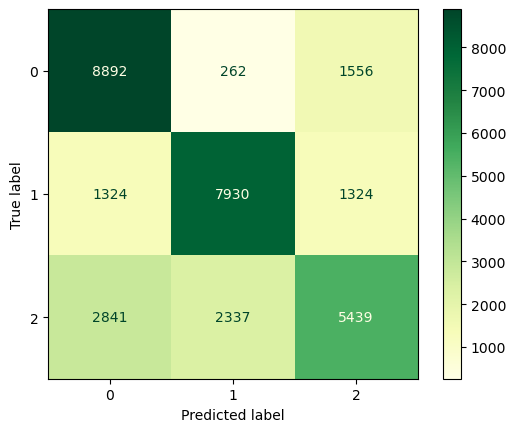

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='YlGn')

In [3]:
credit_data.columns

Index(['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Amount_invested_monthly', 'Interest_Rate', 'Outstanding_Debt',
       'Num_of_Loan', 'Total_Payment_to_Credit_Limit_Ratio',
       'Debt_per_Credit_Card', 'Credit_Card_Utilization_Density',
       'Daily_Payment_Delay', 'High_Credit_Use', 'Credit_Score'],
      dtype='object')

In [127]:
feature_names = ['Customer_ID', 'Annual_Icome', 'Monthly_Inhand_Salary',
       'Amount_invested_monthly', 'Total_Payment_to_Credit_Limit_Ratio',
       'Debt_per_Credit_Card', 'Credit_Card_Utilization_Density',
       'Daily_Payment_Delay', 'High_Credit_Use', 'Loan_Type_Count']
target = "Credit_Score"

### Suport Vector Machine

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = rf_model.predict(X_test)

# Modelin performansını değerlendir
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix ve classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred)

Accuracy: 0.76425


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=[0,1,2])
# disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=LR.classes_)
disp.plot(cmap='Blues')

## Exploratory Data Analysis - Keşifsel Veri Analizi

In [ ]:
credit_data.isnull().sum()

In [281]:
credit_data.drop("Name", inplace=True, axis=1)

In [282]:
credit_data.drop("SSN", inplace=True, axis=1)

In [302]:
credit_data["Payment_of_Min_Amount"].replace("NM","No", inplace=True)

In [303]:
credit_data['Month'] = pd.to_datetime(credit_data['Month'], format='%m').dt.strftime('%B')

In [ ]:
credit_data.info()

In [ ]:
credit_data.describe().T

In [ ]:
object_columns = credit_data.select_dtypes(include='object')
object_columns

## Data Visualization - Veri Görselleştirme

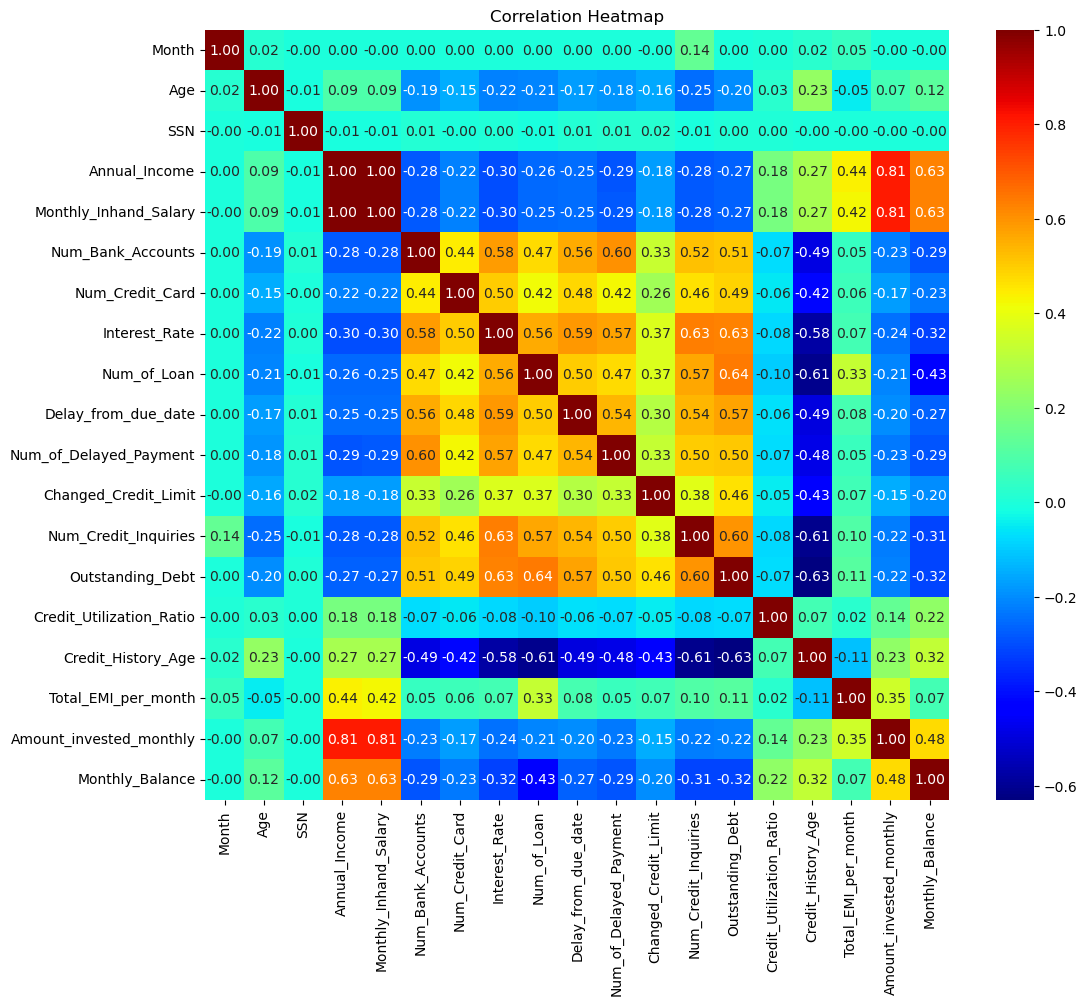

In [326]:
numeric_columns = credit_data.select_dtypes(include='number')
correlation_matrix = numeric_columns.drop(["ID", "Customer_ID"], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='jet')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
grouped_data = credit_data.groupby('Customer_ID')[['Outstanding_Debt', 'Interest_Rate']].mean().reset_index()

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Outstanding_Debt', y='Interest_Rate', hue="Customer_ID", data=grouped_data, palette='viridis', alpha=0.7)
plt.title('Outstanding Debt vs. Interest Rate')
plt.xlabel('Outstanding Debt')
plt.ylabel('Interest Rate')
plt.show()

In [ ]:
percentage_of_payment_behaviour = credit_data['Payment_Behaviour'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_of_payment_behaviour.index, y=percentage_of_payment_behaviour.values, palette='viridis')
plt.title('Percentage of Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')  # X ekseni etiketlerini döndürmek
plt.show()

In [ ]:
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(8, 8))
plt.pie(credit_data['Credit_Score'].value_counts(), labels=credit_data['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Distribution of Credit Scores')
plt.show()

In [ ]:
custom_palette = sns.color_palette("Set3")

# Box plot çizimi
plt.figure(figsize=(12, 8))
sns.boxplot(data=credit_data, y="Credit_Score", x="Monthly_Inhand_Salary", palette="colorblind")
plt.title('Boxplot of Credit Score vs Monthly Inhand Salary')
plt.show()

## Creating New Fatures

In [304]:
# Kredi kartı limitine göre ödenen toplam aylık taksit miktarının bir oranını ifade eder
new_cs = pd.DataFrame()
new_cs["Customer_ID"]=credit_data["Customer_ID"]
new_cs['Total_Payment_to_Credit_Limit_Ratio'] = credit_data['Total_EMI_per_month'] / credit_data['Changed_Credit_Limit']

In [305]:
# Kişinin her bir kredi kartı başına düşen ortalama borcunu gösterir
new_cs['Debt_per_Credit_Card'] = credit_data['Outstanding_Debt'] / credit_data['Num_Credit_Card']
new_cs.loc[credit_data['Num_Credit_Card'] == 0, 'Debt_per_Credit_Card'] = 0

In [306]:
# Ortalama günlük gecikmeyi ifade eder.
new_cs['Daily_Payment_Delay'] = credit_data['Delay_from_due_date'] / 30  

In [307]:
# Kişinin her bir kredi kartı üzerinde ortalama olarak ne kadar kredi kullandığını gösterir
new_cs['Credit_Card_Utilization_Density'] = credit_data['Credit_Utilization_Ratio'] / credit_data['Num_Credit_Card']
new_cs.loc[credit_data['Num_Credit_Card'] == 0, 'Credit_Card_Utilization_Density'] = 0

In [308]:
# Kredi kartı kullanım sıklığının yüzde 70ten fazla olması durumunu kontrol eder ve büyükse bir küçükse 0 işaretler
new_cs['High_Credit_Use'] = (credit_data['Credit_Utilization_Ratio'] >= 0.7).astype(int)

In [309]:
new_cs['Loan_Type_Count'] = credit_data['Type_of_Loan'].apply(lambda x: len([loan.strip() for loan in re.split(',|and', x)]))

In [310]:
label_encoder = LabelEncoder()

new_cs['Credit_Score'] = label_encoder.fit_transform(credit_data['Credit_Score'])

In [311]:
new_cs.sample(3)

,Customer_ID,Total_Payment_to_Credit_Limit_Ratio,Debt_per_Credit_Card,Daily_Payment_Delay,Credit_Card_Utilization_Density,High_Credit_Use,Loan_Type_Count,Credit_Score
20666,12194,0.000000,70.7200,0.533333,6.212324,1,1,2
21624,7794,1.953386,125.5875,0.200000,9.588199,1,4,2
45873,45983,2.552559,228.4800,0.233333,2.854589,1,5,1


In [ ]:
new_cs[new_cs.duplicated()]

In [317]:
new_cs = new_cs.drop_duplicates()
new_cs.head(5)

,Customer_ID,Total_Payment_to_Credit_Limit_Ratio,Debt_per_Credit_Card,Daily_Payment_Delay,Credit_Card_Utilization_Density,High_Credit_Use,Loan_Type_Count,Credit_Score,Annual_Icome,Monthly_Inhand_Salary
0,3392,4.398842,202.495,0.100000,6.705655,1,5,0,19114.12,1824.843333
1,3392,4.398842,202.495,0.100000,7.986240,1,5,0,19114.12,1824.843333
2,3392,4.398842,202.495,0.100000,7.152338,1,5,0,19114.12,1824.843333
3,3392,7.906690,202.495,0.166667,7.844465,1,5,0,19114.12,1824.843333
4,3392,4.398842,202.495,0.200000,6.199337,1,5,0,19114.12,1824.843333


In [312]:
new_cs["Annual_Icome"] = credit_data["Annual_Income"]

In [313]:
new_cs["Monthly_Inhand_Salary"] = credit_data["Monthly_Inhand_Salary"]

## Train Test Splitting

In [ ]:
credit_data.columns

In [ ]:
new_cs.columns

In [ ]:
# X = credit_data.drop(['Customer_ID','Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',"ID", 'Credit_Score',], axis=1)
# y = new_cs['Credit_Score']

X = new_cs.drop(['Customer_ID','Credit_Score'], axis=1)
y = new_cs['Credit_Score']

# Veriyi train ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN modelini oluştur ve eğit
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahmin yap
y_pred = knn_model.predict(X_test_scaled)

# Doğruluk (accuracy) hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")
#0.69895

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree modelini oluştur ve eğit
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_dt = dt_model.predict(X_test)

# Doğruluk (accuracy) hesapla
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix'i oluştur
cm = confusion_matrix(y_test, y_pred_dt)

# Heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, 
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


TypeError: train_test_dataFrame() got an unexpected keyword argument 'csv'